R²: 0.029900289115319945
MAE: 0.03463092271082613
MSE: 0.0022253719309439004


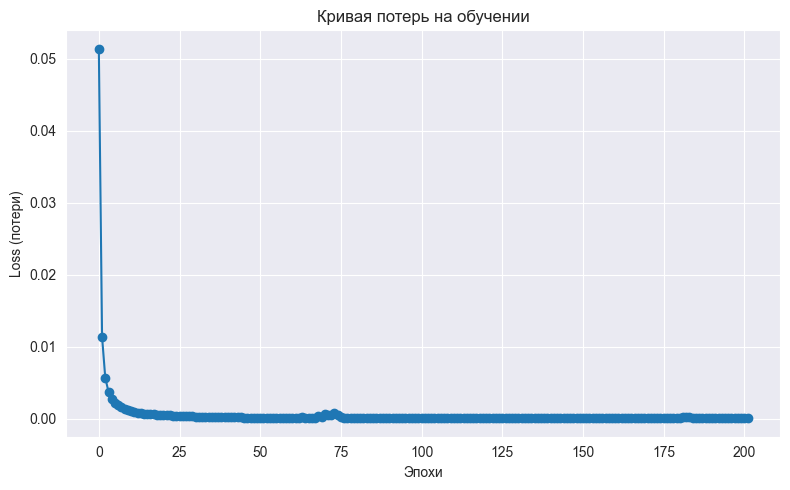

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from os import path
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv(path.join('data_practice.csv'))
smiles = data['smiles']
data = data.drop(data.select_dtypes(include=['object']).columns, axis=1)


X = data.drop(columns='gap').values
y = data['gap'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Модель
mlp = MLPRegressor(hidden_layer_sizes=(64, 64, 64), activation='relu', solver='adam',
                   max_iter=500, early_stopping=True, validation_fraction=0.2, random_state=42)
mlp.fit(X_train, y_train)

# Метрики
y_pred = mlp.predict(X_val)
print("R²:", r2_score(y_val, y_pred))
print("MAE:", mean_absolute_error(y_val, y_pred))
print("MSE:", mean_squared_error(y_val, y_pred))

# График потерь
if hasattr(mlp, 'loss_curve_'):
    plt.figure(figsize=(8, 5))
    plt.plot(mlp.loss_curve_, marker='o')
    plt.title("Кривая потерь на обучении")
    plt.xlabel("Эпохи")
    plt.ylabel("Loss (потери)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [11]:
median_gap = data['gap'].median()
data['gap_class'] = (data['gap'] > median_gap).astype(int)
X = data.drop(columns=['gap', 'gap_class']).values
y = data['gap_class'].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

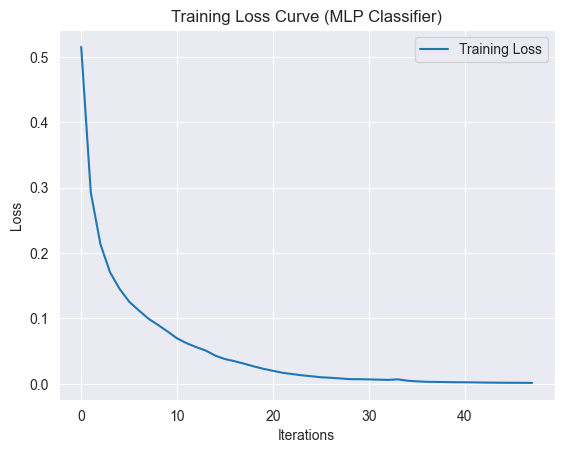

In [13]:
# Деление на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Обучение модели
mlp_clf = MLPClassifier(hidden_layer_sizes=(64, 64),
                        activation='relu',
                        solver='adam',
                        max_iter=500,
                        early_stopping=True,
                        validation_fraction=0.2,
                        random_state=42)

mlp_clf.fit(X_train, y_train)

# Метрики классификации
y_pred = mlp_clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

accuracy, precision, recall

# График потерь на обучающей выборке
plt.plot(mlp_clf.loss_curve_, label='Training Loss')
plt.title("Training Loss Curve (MLP Classifier)")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()